In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problem Statement 3 and 4


Perform the following operations using Python on “Academic performance” dataset  
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or  inconsistencies, use any of the suitable techniques to deal with them.  
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable  techniques to deal with them. 
3. Apply data transformations on at least one of the variables. The purpose of this  transformation should be one of the following reasons: to change the scale for better  understanding of the variable, to convert a non-linear relation into a linear one, or to decrease  the skewness and convert the distribution into a normal distribution. 


In [215]:
import pandas as pd

In [216]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/exam_datasets/3-4. AcademicPerformance.csv')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rollno  100 non-null    int64  
 1   Marks   100 non-null    float64
 2   Gender  100 non-null    int64  
 3   Age     84 non-null     float64
 4   PhD     87 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


In [218]:
df['PhD'] = df['PhD'].fillna('No')

<ipython-input-218-0a7b6e88cc8f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df['Age'] = df['Age'].fillna(df.mean())


In [219]:
df.isnull().sum()

Rollno     0
Marks      0
Gender     0
Age       16
PhD        0
dtype: int64

In [222]:
df = df.fillna(df.mean())

<ipython-input-222-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [223]:
df.isnull().sum()

Rollno    0
Marks     0
Gender    0
Age       0
PhD       0
dtype: int64

In [224]:
import numpy as np
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outliers in {col}:')
    print(outliers)

Outliers in Rollno:
Empty DataFrame
Columns: [Rollno, Marks, Gender, Age, PhD]
Index: []
Outliers in Marks:
    Rollno  Marks  Gender   Age  PhD
18      19  190.0       1  66.0  Yes
56      57  160.0       1  61.0  Yes
Outliers in Gender:
Empty DataFrame
Columns: [Rollno, Marks, Gender, Age, PhD]
Index: []
Outliers in Age:
Empty DataFrame
Columns: [Rollno, Marks, Gender, Age, PhD]
Index: []


In [225]:
df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

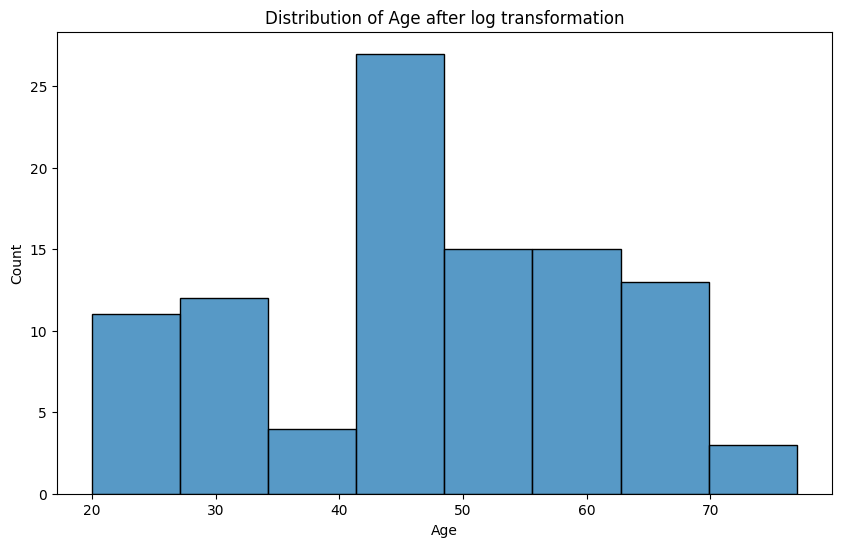

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df[col])
plt.title(f'Distribution of {col} after log transformation')
plt.show()

In [227]:
col = 'Age'

# Change the scale using min-max normalization
df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Convert a non-linear relation into a linear one using log transformation
df[col] = np.log(df[col])

# Decrease skewness and convert the distribution into a normal distribution using square root transformation
df[col] = np.sqrt(df[col])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


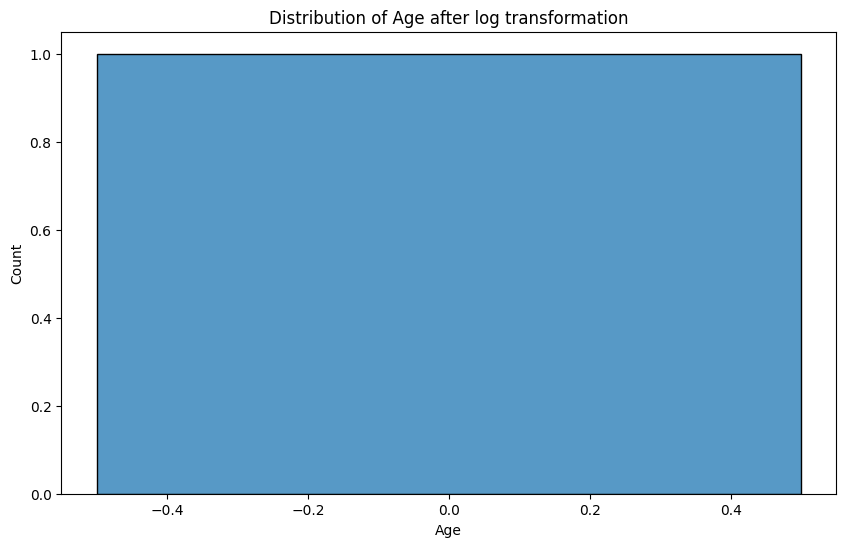

In [228]:
plt.figure(figsize=(10, 6))
sns.histplot(df[col])
plt.title(f'Distribution of {col} after log transformation')
plt.show()